In [ ]:
import torch

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear = torch.nn.Linear(2, 1, bias=True)

    def forward(self, x):
        y_hat = self.linear(x)
        return y_hat

x_lst = torch.Tensor([[1, 30],
                      [3, 29],
                      [5, 28],
                      [7, 24],
                      [9, 25]])
y_lst = torch.Tensor([100, 75, 60, 25, 15]).view(-1, 1)

net = Net()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

for epoch in range(2000):
    y_hat = net(x_lst)
    
    loss = criterion(y_hat, y_lst)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch={epoch}, loss={loss.item():0.5f}')

for name, param in net.named_parameters():
    print(name, param.data)

x_test = torch.Tensor([[7, 24]])
y_test = net(x_test)
print(f'{x_test[0,1]}도에서 {x_test[0,0]}시간 수면 후 피곤한 정도: {y_test.item():0.2f}')

epoch=0, loss=2580.85010
epoch=100, loss=17.16257
epoch=200, loss=4.62926
epoch=300, loss=4.40990
epoch=400, loss=4.40573
epoch=500, loss=4.40530
epoch=600, loss=4.40493
epoch=700, loss=4.40456
epoch=800, loss=4.40422
epoch=900, loss=4.40383
epoch=1000, loss=4.40348
epoch=1100, loss=4.40313
epoch=1200, loss=4.40277
epoch=1300, loss=4.40242
epoch=1400, loss=4.40204
epoch=1500, loss=4.40169
epoch=1600, loss=4.40133
epoch=1700, loss=4.40095
epoch=1800, loss=4.40061
epoch=1900, loss=4.40026
linear.weight tensor([[-8.3395,  3.5724]])
linear.bias tensor([-0.4417])
24.0도에서 7.0시간 수면 후 피곤한 정도: 26.92


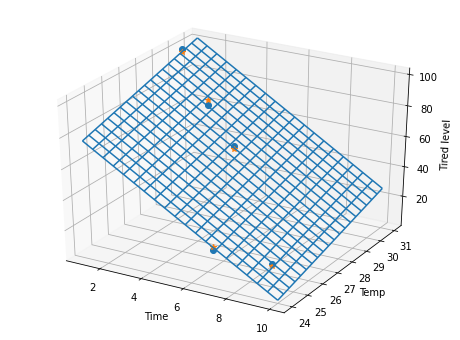

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8,6))
ax3d = plt.axes(projection="3d")

xdata = np.linspace(1,10,20)
ydata = np.linspace(24,31,20)
X,Y = np.meshgrid(xdata,ydata)
Z = -8.3545*X+3.5528*Y+0.1666

ax3d = plt.axes(projection='3d')
ax3d.plot_wireframe(X, Y, Z)
ax3d.set_xlabel('Time')
ax3d.set_ylabel('Temp')
ax3d.set_zlabel('Tired level')

net.eval()
y_test = net(x_lst)

plt.plot(x_lst[:,0].detach().numpy(), 
         x_lst[:,1].detach().numpy(),
         y_lst[:,0].detach().numpy(), 'o')

plt.plot(x_lst[:,0].detach().numpy(), 
         x_lst[:,1].detach().numpy(),
         y_test[:,0].detach().numpy(), '*')

plt.show()